In \[67\]:

    import pandas as pd
    import re
    import string
    import numpy as np
    from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
    import pandas as pd
    import numpy as np
    import scipy as sp
    import sklearn
    import sys
    import nltk
    from nltk.corpus import stopwords
    from gensim.models import ldamodel
    import gensim.corpora
    from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
    from sklearn.decomposition import NMF
    from sklearn.preprocessing import normalize
    import pickle
    from gensim.models import LdaModel
    from gensim.corpora import Dictionary
    import pyLDAvis.gensim
    import warnings
    from itertools import chain
    import matplotlib.pyplot as plt
    import seaborn as sns
    import warnings
    warnings.filterwarnings('ignore')
    from nltk.stem.wordnet import WordNetLemmatizer
    lmtzr = WordNetLemmatizer()
    import numpy as np 
    import pandas as pd
    import string
    import re
    from tqdm._tqdm_notebook import tqdm_notebook,tnrange,tqdm
    from collections import Counter,OrderedDict
    from gensim import models,corpora
    from gensim.summarization import summarize,keywords
    import warnings
    import pyLDAvis.gensim
    import matplotlib.pyplot as plt
    import seaborn as sns
    import pyLDAvis.gensim
    import gensim.models.phrases as gen
    from gensim.models.coherencemodel import CoherenceModel

# Loading Data<a href="#Loading-Data" class="anchor-link">¶</a>

Download Data from <https://www.kaggle.com/hsankesara/medium-articles>

In \[68\]:

    data=pd.read_csv("articles.csv")
    len(data)

Out\[68\]:

    337

In \[2\]:

    import pandas as pd

In \[3\]:

    data=pd.read_csv('articles.csv')

In \[4\]:

    data.head(1)

Out\[4\]:

|     | author     | claps | reading_time | link                                              | title                                             | text                                               |
|-----|------------|-------|--------------|---------------------------------------------------|---------------------------------------------------|----------------------------------------------------|
| 0   | Justin Lee | 8.3K  | 11           | https://medium.com/swlh/chatbots-were-the-next... | Chatbots were the next big thing: what happene... | Oh, how the headlines blared:\\nChatbots were T... |

In \[69\]:

    data.head(5)

Out\[69\]:

|     | author           | claps | reading_time | link                                              | title                                             | text                                               |
|-----|------------------|-------|--------------|---------------------------------------------------|---------------------------------------------------|----------------------------------------------------|
| 0   | Justin Lee       | 8.3K  | 11           | https://medium.com/swlh/chatbots-were-the-next... | Chatbots were the next big thing: what happene... | Oh, how the headlines blared:\\nChatbots were T... |
| 1   | Conor Dewey      | 1.4K  | 7            | https://towardsdatascience.com/python-for-data... | Python for Data Science: 8 Concepts You May Ha... | If you’ve ever found yourself looking up the s...  |
| 2   | William Koehrsen | 2.8K  | 11           | https://towardsdatascience.com/automated-featu... | Automated Feature Engineering in Python – Towa... | Machine learning is increasingly moving from h...  |
| 3   | Gant Laborde     | 1.3K  | 7            | https://medium.freecodecamp.org/machine-learni... | Machine Learning: how to go from Zero to Hero ... | If your understanding of A.I. and Machine Lear...  |
| 4   | Emmanuel Ameisen | 935   | 11           | https://blog.insightdatascience.com/reinforcem... | Reinforcement Learning from scratch – Insight ... | Want to learn about applied Artificial Intelli...  |

In \[70\]:

    data['length_text'] = data['text'].str.len()
    sns.distplot(data['length_text'], color="r")
    plt.show()

![](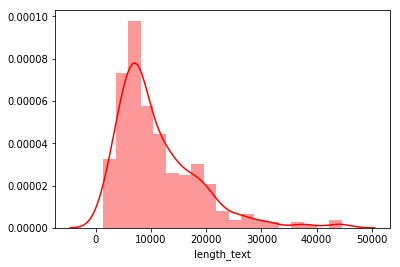%0A)

In \[71\]:

    data['length_title'] = data['title'].str.len()
    sns.distplot(data['length_title'], color="r")
    plt.show()

![](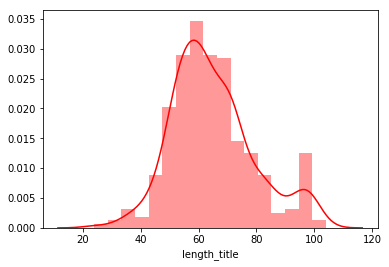%0A)

In \[110\]:

    titles = [x for x in data['title']]
    docs = [x for x in data['text']]

In \[111\]:

    nltk.download('stopwords')

    [nltk_data] Downloading package stopwords to
    [nltk_data]     /Users/anusha/nltk_data...
    [nltk_data]   Package stopwords is already up-to-date!

Out\[111\]:

    True

In \[112\]:

    from nltk.corpus import stopwords
    stop_words = stopwords.words('english')
    stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

# Data Preprocessing<a href="#Data-Preprocessing" class="anchor-link">¶</a>

We use NLTK’s Wordnet to find the meanings of words, synonyms, antonyms,
and more. In addition, we use WordNetLemmatizer to get the root word.
Filter out stop words.

In \[192\]:

    # A function to prepare the text for topic modelling
    def words(text):
        regex = re.compile('[' + re.escape(string.punctuation) + '0-9\\r\\t\\n]')
        text = regex.sub(" ", text.lower())
        words = text.split(" ")
        words = [re.sub('\S*@\S*\s?', '', sent) for sent in words]
        words = [re.sub('\s+', ' ', sent) for sent in words]
        words = [re.sub("\'", "", sent) for sent in words]
        words = [w for w in words if not len(w) < 2]
        words = [w for w in words if w not in stop_words]
        words = [lmtzr.lemmatize(w) for w in words]
        
        return words

In \[114\]:

    nltk.download('wordnet')
    docs = [words(x) for x in data['text']]

    [nltk_data] Downloading package wordnet to /Users/anusha/nltk_data...
    [nltk_data]   Package wordnet is already up-to-date!

In \[115\]:

     # Create a dictionary representation of the documents.
    dictionary = Dictionary(docs)
    print('Number of unique words in initital documents:', len(dictionary))

    # Filter out words that occur less than 10 documents, or more than 20% of the documents.
    dictionary.filter_extremes(no_below=10, no_above=0.2)
    print('Number of unique words after removing rare and common words:', len(dictionary))

    Number of unique words in initital documents: 18975
    Number of unique words after removing rare and common words: 2720

In \[148\]:

    corpus = [dictionary.doc2bow(doc) for doc in docs]
    #print(len(corpus))
    #corpus[336]
    bow_doc_300 = corpus[300]

    for i in range(len(bow_doc_300)):
        print("Word {} (\"{}\") appears {} time.".format(bow_doc_300[i][0], 
                                                         dictionary[bow_doc_300[i][0]], 
                                                         bow_doc_300[i][1]))

    Word 47 ("close") appears 1 time.
    Word 51 ("command") appears 1 time.
    Word 65 ("cool") appears 1 time.
    Word 121 ("gate") appears 1 time.
    Word 189 ("multi") appears 1 time.
    Word 213 ("predicted") appears 1 time.
    Word 247 ("scene") appears 1 time.
    Word 281 ("terminal") appears 1 time.
    Word 321 ("column") appears 6 time.
    Word 339 ("excellent") appears 1 time.
    Word 370 ("matrix") appears 1 time.
    Word 431 ("www") appears 1 time.
    Word 434 ("additional") appears 1 time.
    Word 455 ("collection") appears 3 time.
    Word 489 ("github") appears 1 time.
    Word 503 ("irrelevant") appears 1 time.
    Word 506 ("learning”") appears 1 time.
    Word 535 ("ready") appears 1 time.
    Word 538 ("relationship") appears 3 time.
    Word 571 ("“deep") appears 1 time.
    Word 579 ("andrew") appears 1 time.
    Word 617 ("guess") appears 1 time.
    Word 652 ("neuron") appears 4 time.
    Word 736 ("comprehensive") appears 1 time.
    Word 767 ("enables") appears 1 time.
    Word 774 ("explanation") appears 1 time.
    Word 777 ("faced") appears 1 time.
    Word 857 ("studied") appears 1 time.
    Word 906 ("combination") appears 3 time.
    Word 931 ("diagram") appears 2 time.
    Word 932 ("direct") appears 3 time.
    Word 938 ("earlier") appears 1 time.
    Word 950 ("feed") appears 1 time.
    Word 987 ("multiplication") appears 1 time.
    Word 991 ("notice") appears 1 time.
    Word 998 ("pixel") appears 2 time.
    Word 1052 ("apple") appears 2 time.
    Word 1103 ("trend") appears 2 time.
    Word 1107 ("visually") appears 1 time.
    Word 1167 ("correlation") appears 2 time.
    Word 1170 ("economics") appears 1 time.
    Word 1227 ("connection") appears 2 time.
    Word 1296 ("noticed") appears 1 time.
    Word 1353 ("third") appears 1 time.
    Word 1419 ("discover") appears 1 time.
    Word 1461 ("university") appears 1 time.
    Word 1487 ("considered") appears 2 time.
    Word 1559 ("oxford") appears 1 time.
    Word 1597 ("super") appears 1 time.
    Word 1612 ("what’s") appears 1 time.
    Word 1624 ("backwards") appears 1 time.
    Word 1650 ("handle") appears 1 time.
    Word 1666 ("ok") appears 2 time.
    Word 1676 ("situation") appears 1 time.
    Word 1738 ("smarter") appears 1 time.
    Word 1803 ("trick") appears 1 time.
    Word 1976 ("editor") appears 1 time.
    Word 2099 ("hidden") appears 1 time.
    Word 2190 ("latest") appears 1 time.
    Word 2304 ("exhibit") appears 1 time.
    Word 2359 ("io") appears 1 time.
    Word 2404 ("adjusting") appears 2 time.
    Word 2507 ("calculates") appears 1 time.
    Word 2520 ("invention") appears 1 time.
    Word 2528 ("submit") appears 1 time.
    Word 2533 ("wild") appears 1 time.
    Word 2606 ("politics") appears 1 time.
    Word 2618 ("permission") appears 1 time.
    Word 2671 ("py") appears 1 time.
    Word 2673 ("behaviour") appears 2 time.

# Topic Modeling using LDA<a href="#Topic-Modeling-using-LDA" class="anchor-link">¶</a>

LDA :: Latent Dirichlet Allocation is a probabilistic model. It is a
unsupervised machine learning technique. And to obtain cluster
assignments, it uses two probability values: P( word \| topics) and P(
topics \| documents).

pyLDAvis is designed to help users interpret the topics in a topic model
that has been fit to a corpus of text data. The package extracts
information from a fitted LDA topic model to inform an interactive
web-based visualization.

The size of the bubble measures the importance of the topics, relative
to the data. When we have 5 or 10 topics, we can see certain topics are
clustered together (overlapping bubbles), this indicates the similarity
between topics.

In \[149\]:

    def get_lda_topics(model, num_topics):
        word_dict = {};
        for i in range(num_topics):
            words = model.show_topic(i, topn = 20);
            word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words];
        return pd.DataFrame(word_dict);

In \[150\]:

    get_lda_topics(lda_model, 10)

Out\[150\]:

|     | Topic \# 01     | Topic \# 02 | Topic \# 03 | Topic \# 04     | Topic \# 05   | Topic \# 06  | Topic \# 07    | Topic \# 08 | Topic \# 09 | Topic \# 10  |
|-----|-----------------|-------------|-------------|-----------------|---------------|--------------|----------------|-------------|-------------|--------------|
| 0   | neuron          | star        | cpu         | de              | cluster       | bot          | car            | table       | pixel       | cnn          |
| 1   | activation      | review      | house       | member          | agent         | conversation | music          | reward      | woman       | sheet        |
| 2   | matrix          | rating      | gtx         | sound           | policy        | behavior     | graph          | startup     | men         | box          |
| 3   | zero            | average     | sentence    | title           | host          | social       | batch          | recognize   | convolution | region       |
| 4   | player          | weighted    | gpu         | speech          | response      | simulation   | vehicle        | array       | kernel      | pixel        |
| 5   | policy          | university  | sequence    | et              | lstm          | apps         | track          | tutorial    | facial      | bounding     |
| 6   | man             | interview   | app         | en              | noise         | interface    | driving        | translation | channel     | mask         |
| 7   | sigmoid         | engineering | card        | watson          | trust         | cognitive    | placeholder    | phrase      | filter      | proposal     |
| 8   | derivative      | programming | gpus        | feed            | reinforcement | response     | song           | distance    | edge        | segmentation |
| 9   | alphago         | assignment  | letter      | netflix         | unit          | chatbots     | computation    | convolution | orientation | www          |
| 10  | backpropagation | github      | market      | wave            | rl            | political    | sort           | cloud       | “do         | numpy        |
| 11  | descent         | option      | translation | recommendation  | sequence      | participant  | matrix         | api         | page        | cnns         |
| 12  | relu            | estimated   | ti          | audio           | worker        | interaction  | stock          | expected    | matrix      | org          |
| 13  | tree            | skill       | price       | recipe          | supervised    | intelligent  | representation | device      | classifier  | map          |
| 14  | distribution    | coursera    | character   | personalization | clustering    | control      | minute         | block       | opposite    | insight      |
| 15  | regression      | cover       | box         | assistant       | transaction   | turing       | index          | agent       | age         | en           |
| 16  | board           | timeline    | rnn         | offline         | reward        | digital      | bias           | map         | wear        | wikipedia    |
| 17  | outcome         | taught      | dl          | hypothesis      | recall        | automated    | recommendation | max         | straight    | scipy        |
| 18  | representation  | andrew      | aws         | message         | score         | asked        | generator      | tweet       | measurement | scikit       |
| 19  | semantic        | paid        | recurrent   | chunk           | github        | customer     | programming    | grid        | eye         | panda        |

In \[117\]:

    # Build LDA model
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                               id2word=id2word,
                                               num_topics=10, 
                                               random_state=100,
                                               update_every=1,
                                               chunksize=500,
                                               passes=20,
                                               alpha='auto',
                                               per_word_topics=True)

In \[118\]:

    pyLDAvis.enable_notebook()
    warnings.filterwarnings("ignore", category=DeprecationWarning)

In \[119\]:

    pyLDAvis.gensim.prepare(model, corpus, dictionary)

Out\[119\]:

The above is the visual representation of the topic modelling and the
below is the raw representation and we can specify #words with highest
probability to display in each topic.

In \[120\]:

    lda_model.save('model10.gensim')
    topics = lda_model.print_topics(num_words=6)
    for topic in topics:
        print(topic)

    (0, '0.019*"neuron" + 0.010*"activation" + 0.009*"matrix" + 0.008*"zero" + 0.008*"player" + 0.008*"policy"')
    (1, '0.017*"star" + 0.015*"review" + 0.012*"rating" + 0.011*"average" + 0.010*"weighted" + 0.010*"university"')
    (2, '0.010*"cpu" + 0.010*"house" + 0.009*"gtx" + 0.009*"sentence" + 0.009*"gpu" + 0.008*"sequence"')
    (3, '0.034*"de" + 0.014*"member" + 0.012*"sound" + 0.011*"title" + 0.009*"speech" + 0.009*"et"')
    (4, '0.014*"cluster" + 0.012*"agent" + 0.008*"policy" + 0.007*"host" + 0.007*"response" + 0.007*"lstm"')
    (5, '0.011*"bot" + 0.006*"conversation" + 0.005*"behavior" + 0.005*"social" + 0.005*"simulation" + 0.004*"apps"')
    (6, '0.011*"car" + 0.010*"music" + 0.008*"graph" + 0.008*"batch" + 0.007*"vehicle" + 0.006*"track"')
    (7, '0.023*"table" + 0.009*"reward" + 0.008*"startup" + 0.007*"recognize" + 0.007*"array" + 0.006*"tutorial"')
    (8, '0.020*"pixel" + 0.018*"woman" + 0.016*"men" + 0.015*"convolution" + 0.015*"kernel" + 0.011*"facial"')
    (9, '0.095*"cnn" + 0.035*"sheet" + 0.035*"box" + 0.034*"region" + 0.021*"pixel" + 0.020*"bounding"')

In \[ \]:

    #Performance evaluation by classifying sample document using LDA Bag of Words model
    for index, score in sorted(lda_model[corpus[300]], key=lambda tup: -1*tup[1]) :
        print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 40)))

# Topic Modeling using NMF<a href="#Topic-Modeling-using-NMF" class="anchor-link">¶</a>

In \[158\]:

    data_text = data[['text']]
    data_text = data_text.astype('str')

In \[191\]:

    articles = [value[0] for value in data_text.iloc[0:].values]

In \[161\]:

    articles_sentences = [' '.join(text) for text in articles]

In \[162\]:

    # obtain a Counts design matrix
    vectorizer = CountVectorizer(analyzer='word', max_features=1000);
    x_counts = vectorizer.fit_transform(articles_sentences);

In \[163\]:

    # set a TfIdf transformer, and transfer the counts with the model.
    transformer = TfidfTransformer()
    x_tfidf = transformer.fit_transform(x_counts);

In \[164\]:

    #normalize the TfIdf values
    xtfidf_norm = normalize(x_tfidf, norm='l1', axis=1)

In \[166\]:

    num_topics = 10
    model = NMF(n_components=num_topics, init='nndsvd');
    model.fit(xtfidf_norm)

Out\[166\]:

    NMF(alpha=0.0, beta_loss='frobenius', init='nndsvd', l1_ratio=0.0,
      max_iter=200, n_components=10, random_state=None, shuffle=False,
      solver='cd', tol=0.0001, verbose=0)

In \[173\]:

    ## Get words from each topic 
    def get_nmf_topics(model, n_top_words):
        #the word ids obtained need to be reverse-mapped to the words so we can print the topic names.
        feat_names = vectorizer.get_feature_names()
        word_dict = {};
        for i in range(num_topics):
            words_ids = model.components_[i].argsort()[:-20 - 1:-1]
            words = [feat_names[key] for key in words_ids]
            words = [re.sub('\S*@\S*\s?', '', sent) for sent in words]
            words = [re.sub('\s+', ' ', sent) for sent in words]
            words = [re.sub("\'", "", sent) for sent in words]
            word_dict['Topic # ' + '{:02d}'.format(i+1)] = words;
        return pd.DataFrame(word_dict);

In \[188\]:

    get_nmf_topics(model, 20)

Out\[188\]:

|     | Topic \# 01 | Topic \# 02  | Topic \# 03 | Topic \# 04 | Topic \# 05    | Topic \# 06 | Topic \# 07 | Topic \# 08 | Topic \# 09 | Topic \# 10 |
|-----|-------------|--------------|-------------|-------------|----------------|-------------|-------------|-------------|-------------|-------------|
| 0   | you         | feature      | policy      | you         | bot            | you         | you         | you         | you         | you         |
| 1   | ml          | features     | learning    | functions   | the            | good        | good        | good        | good        | good        |
| 2   | learning    | featuretools | learn       | list        | bots           | happening   | happening   | happening   | happening   | happening   |
| 3   | machine     | data         | actions     | function    | it             | hand        | hand        | hand        | hand        | hand        |
| 4   | course      | primitives   | deep        | data        | chatbots       | guis        | guis        | guis        | guis        | guis        |
| 5   | even        | table        | value       | if          | and            | growthbot   | growthbot   | growthbot   | growthbot   | growthbot   |
| 6   | get         | tables       | the         | python      | apps           | growth      | growth      | growth      | growth      | growth      |
| 7   | if          | the          | this        | numpy       | re             | group       | group       | group       | group       | group       |
| 8   | re          | client       | state       | lambda      | human          | greedy      | greedy      | greedy      | greedy      | greedy      |
| 9   | world       | engineering  | rl          | one         | way            | great       | great       | great       | great       | great       |
| 10  | new         | entityset    | function    | syntax      | we             | grasp       | grasp       | grasp       | grasp       | grasp       |
| 11  | don         | deep         | in          | pandas      | that           | graphical   | graphical   | graphical   | graphical   | graphical   |
| 12  | video       | many         | use         | science     | conversational | gradients   | gradients   | gradients   | gradients   | gradients   |
| 13  | cool        | multiple     | we          | re          | information    | got         | got         | got         | got         | got         |
| 14  | data        | loans        | action      | dataframes  | like           | google      | google      | google      | google      | google      |
| 15  | people      | we           | environment | columns     | one            | going       | going       | going       | going       | going       |
| 16  | understand  | use          | estimates   | column      | nlp            | ft          | ft          | ft          | ft          | ft          |
| 17  | this        | process      | us          | resources   | user           | goal        | goal        | goal        | goal        | goal        |
| 18  | that        | model        | network     | creating    | but            | go          | go          | go          | go          | go          |
| 19  | it          | dataframe    | good        | example     | interfaces     | gives       | gives       | gives       | gives       | gives       |

# Cosine Similarity b/w Documents<a href="#Cosine-Similarity-b/w-Documents" class="anchor-link">¶</a>

Given a keyword, Document Recommender system can suggest you the best
documents from the pool of documents.

In \[175\]:

    words_list=list(chain.from_iterable(docs))

In \[176\]:

    # Cosine similarity
    def cosine_sim(text1, text2):
        tfidf_score = TfidfVectorizer().fit_transform([text1, text2])
        return ((tfidf_score * tfidf_score.T).A)[0, 1]

    # Most similar article
    def closest_doc_name(sentence, docs):
        cos = []
        for i in range(len(docs)):
            cos.append(cosine_sim(', '.join(sentence.split(' ')),', '.join(docs[i])))
        return [titles[x] for x in np.argsort(cos)[-10:][::-1]]

In \[184\]:

    from sklearn.feature_extraction.text import TfidfVectorizer
    tfidf = TfidfVectorizer(tokenizer=words, stop_words=stop_words).fit(words_list)

In \[196\]:

    closest_doc_name('news', docs)

Out\[196\]:

    ['How Artificial Intelligence can improve online news',
     'The 7 Best Data Science and Machine Learning Podcasts',
     'The Rise of the Weaponized AI Propaganda Machine – Scout: Science Fiction + Journalism – Medium',
     'The Rise of the Weaponized AI Propaganda Machine – Scout: Science Fiction + Journalism – Medium',
     'AI is coming, and it will be boring – Denny Vrandečić – Medium',
     'ИИ-психопат и ИИ-обманщик – Hey Machine Learning',
     'Turn your Raspberry Pi into homemade Google Home – Becoming Human: Artificial Intelligence Magazine',
     'What worries me about AI – François Chollet – Medium',
     'Announcing Poncho the WeatherBot – Render-from-betaworks',
     'Investing in Artificial Intelligence – Nathan Benaich – Medium']

In \[ \]:

     

In \[ \]:

     

In \[ \]: